
# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives


This experiment predicts pollution w.r.t weather conditions.
At the end of the experiment, you will be able to:

* understand how to perform Time series prediction using RNN. </br>

**Please ensure GPU is turned ON for this experiment**




In [1]:
#@title Experiment Explanation Video
from IPython.display import HTML

HTML("""<video width="500" height="300" controls>
  <source src="https://cdn.talentsprint.com/aiml/AIML_BATCH_HYD_7/10march/pollution_wrt_weather.mp4" type="video/mp4">
</video>
""")

## Dataset



### Description

In this experiment we use weather and the level of pollution of US embassy in Beijing, China. This is a dataset that reports on the weather and the level of pollution each hour for five years at the US embassy in Beijing, China.

The data includes the date-time, the pollution called PM2.5 concentration, and the weather information including dew point, temperature, pressure, wind direction, wind speed and the cumulative number of hours of snow and rain. 

The complete feature list in the raw data is as follows:

1. No: row number
2. year: year of data in this row
3. month: month of data in this row
4. day: day of data in this row
5. hour: hour of data in this row
6. pm2.5: PM2.5 concentration
7. DEWP: Dew Point
8. TEMP: Temperature
9. PRES: Pressure
10. cbwd: Combined wind direction
11. Iws: Cumulated wind speed
12. Is: Cumulated hours of snow
13. Ir: Cumulated hours of rain

We can use this data and frame a forecasting problem where, given the weather conditions and pollution for prior hours, we forecast the pollution at the next hour.

This dataset can be used to frame other forecasting problems.


You can download the dataset from the UCI Machine Learning Repository.

 [Beijing PM2.5 Data Data Set](https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data)

## Domain Information

 Weather is the state of atmosphere at a particular time and place. It comprises of various components such as wind, temperature, pressure etc. We know from experience that the weather conditions, are similar to the conditions obtaining upto that point of time. In other words, the weather conditions of a day can be predicted by studying the weather conditions of previous days. Hence, it is a perfect example of time series.

Usually the normal dataset only has observations. But, in time series dataset, there must be one time component.This makes it more complicated and challenging to solve.

**Note:** People often confuse between understanding a time series dataset and predicting the future through dataset. Understanding a time series dataset requires detailed analysis so that you can answer why a particular approach/algorithm is the best fit. While predicting the future, involves considering approaches/algorithms that were used in the historical dataset so that you can use the same and predict the next hour weather.

The power of a time series forecasting model is determined by its performance or accuracy at predicting the future. This is often at the expense of being able to explain why a specific prediction was made, what the confidence intervals are and what are the underlying causes.

## AI / ML Technique

**Recurrent Neural Networks:**
Humans don’t start their thinking from scratch every second. As you read this essay, you understand each word based on your understanding of previous words. You don’t throw everything away and start thinking from scratch again. Your thoughts have persistence.

Traditional neural networks can’t do this, and it seems like a major shortcoming. For example, imagine you want to classify what kind of event is happening at every point in a movie. It’s unclear how a traditional neural network could use its reasoning about previous events in the film to inform later ones.

#### Keywords

* Time series
* scaling
* normalisation
* llinear regression

#### Expected time to complete this experiment is : 60min

#### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P181902118" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "8860303743" #@param {type:"string"}


In [5]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook="BLR_M2W3E27_Pollution_WRT_Weather" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch") 
    ipython.magic("sx pip3 install torch")
    ipython.magic("sx pip3 install torchvision")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week5/Exp11/pollution.csv")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week5/Exp11/PRSA_data_2010.1.1-2014.12.31.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    from IPython.display import HTML
    HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id))
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


#### Data Preprocessing

The data is not ready to use. We must prepare it first.

Below are the first few rows of the raw dataset.

In [0]:
from torch import nn
import torch

In [0]:
from matplotlib import pyplot as plt

In [9]:
from pandas import read_csv
from datetime import datetime
dataset = read_csv('PRSA_data_2010.1.1-2014.12.31.csv')
dataset.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


- The first step is to consolidate the date-time information into a single date-time so that we can use it as an index in Pandas.

- A quick check reveals NA values for pm2.5 for the first 24 hours. We will, therefore, need to remove the first row of data. There are also a few scattered “NA” values later in the dataset; we can mark them with 0 values for now.

- The script below loads the raw dataset and parses the date-time information as the Pandas DataFrame index. The “No” column is dropped and then clearer names are specified for each column. Finally, the NA values are replaced with “0” values and the first 24 hours are removed.

- The “No” column is dropped and then clearer names are specified for each column. Finally, the NA values are replaced with “0” values and the first 24 hours are removed.

In [10]:
from datetime import datetime
# load data

def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')

dataset = read_csv('PRSA_data_2010.1.1-2014.12.31.csv', 
                   parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)

dataset.drop('No', axis=1, inplace=True)

# manually specify column names
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'

# mark all NA values with 0
dataset['pollution'].fillna(0, inplace=True)

# drop the first 24 hours
dataset = dataset[24:]
# summarize first 5 rows
print(dataset.head(5))
# save to file
dataset.to_csv('pollution.csv')

                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-02 00:00:00      129.0  -16  -4.0  1020.0      SE     1.79     0     0
2010-01-02 01:00:00      148.0  -15  -4.0  1020.0      SE     2.68     0     0
2010-01-02 02:00:00      159.0  -11  -5.0  1021.0      SE     3.57     0     0
2010-01-02 03:00:00      181.0   -7  -5.0  1022.0      SE     5.36     1     0
2010-01-02 04:00:00      138.0   -7  -5.0  1022.0      SE     6.25     2     0


In [11]:
len(dataset)

43800

####  Data Visualization
we can create a quick plot of each series and see what we have.

The code below loads the new “pollution.csv” file and plots each series as a separate subplot, except wind speed dir, which is categorical.

In [0]:
%matplotlib inline

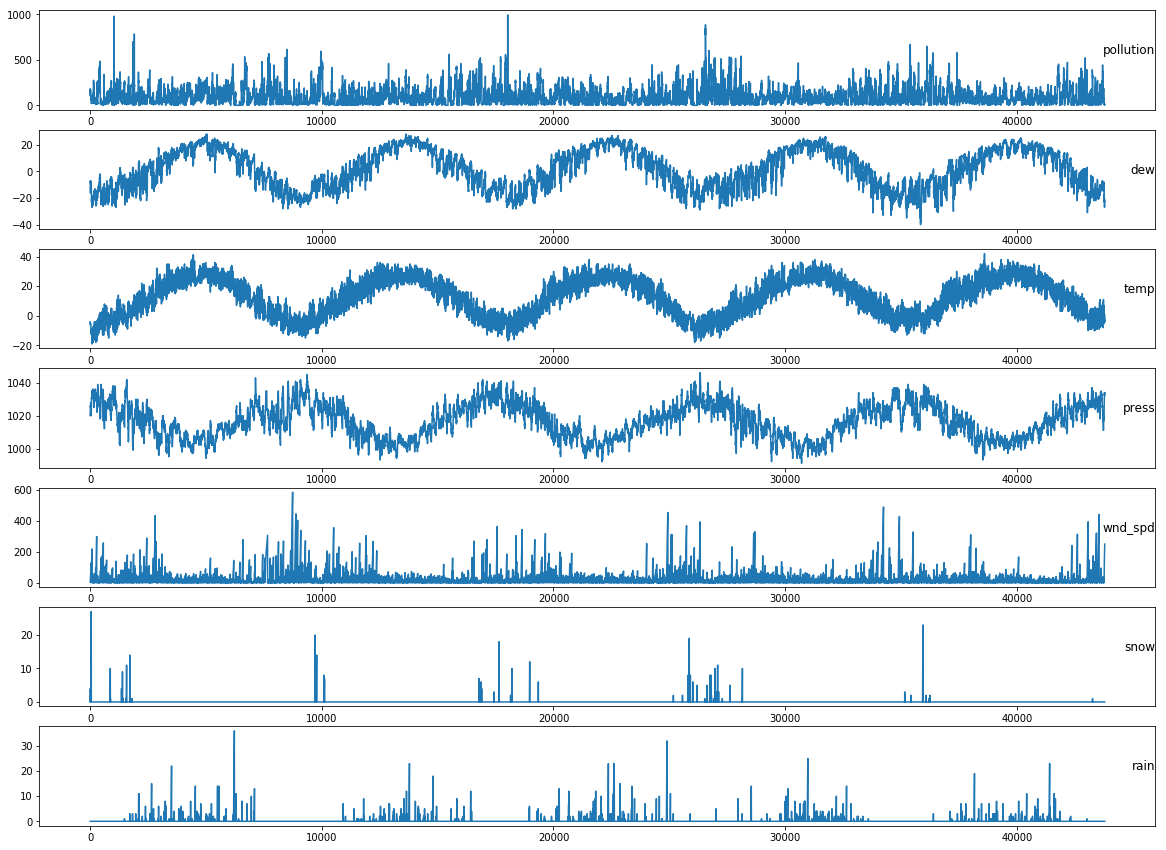

In [13]:
from pandas import read_csv

# load dataset
dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values

# specify columns to plot , skip 4 becoz it is categorical
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
plt.figure(figsize=(20,15))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

#### Preparing Data for Time Series Prediction

- The first step is to prepare the pollution dataset for the Time Series problem.

- This involves framing the dataset as a supervised learning problem and normalizing the input variables.

- We will frame the supervised learning problem as predicting the pollution at the current hour (t) given the pollution measurement and weather conditions at the prior time step. So, the input is features at time step(t-1) and output is pollution at time t. 

- We can transform the dataset using the series_to_supervised() function given in code



- Steps to convert the  Time Series to a Supervised Learning Problem are:
    
    1. Load the “pollution.csv” dataset 
    2. Label encoded (integer encoded) the wind speed feature
    3. Normalize the Dataset
    4. Transform the dataset into supervised learning problem by calling tghe function "series_to_supervised"
    
    
    
- Series to supervised function:

    - Intution is in time series forecasting terminology the current time (t) and future times (t+1, t+n) are forecast times and past observations (t-1, t-n) are used to make forecasts.
    - We can see how positive and negative shifts can be used to create a new DataFrame from a time series with sequences of input and output patterns for a supervised learning problem.
    - This permits not only classical X -> y prediction, but also X -> Y where both input and output can be sequences.
    - The function takes four arguments:

        1. data: Sequence of observations as a list or 2D NumPy array. Required.
        2. n_in: Number of lag observations as input (X). Values may be between [1..len(data)] Optional. Defaults to 1.
        3. n_out: Number of observations as output (y). Values may be between [0..len(data)-1]. Optional. Defaults to 1.
        4 . dropnan: Boolean whether or not to drop rows with NaN values. Optional. Defaults to True.

        5. The function returns Pandas DataFrame of series framed for supervised learning.



In [0]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    
    n_vars = data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 

#### convert series to supervised learning

In [15]:

from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np
import pandas as pd

# load dataset
dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
print(values.shape)

# integer encode direction
encoder = preprocessing.LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# previous 1 hour features used for framing as supervised learning problem 
## specify the number of lag hours
n_hours1 = 1
n_features1 = 8
reframed1 = series_to_supervised(scaled, n_hours1, 1)
reframed1.head()
#print("\n")

(43800, 8)


,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
1,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0
2,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0
3,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0
4,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0
5,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0,0.109658,0.485294,0.213115,0.563637,0.666667,0.011433,0.111111,0.0


In [16]:
# previous 3 hour features used for framing as supervised learning problem 
## specify the number of lag hours
n_hours2 = 3
n_features2 = 8
reframed2 = series_to_supervised(scaled, n_hours2, 1)
reframed2.head()

,var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var6(t-3),var7(t-3),var8(t-3),var1(t-2),var2(t-2),...,var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
3,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893,0.367647,...,0.000000,0.0,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0
4,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960,0.426471,...,0.037037,0.0,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0
5,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0,0.182093,0.485294,...,0.074074,0.0,0.109658,0.485294,0.213115,0.563637,0.666667,0.011433,0.111111,0.0
6,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0,0.138833,0.485294,...,0.111111,0.0,0.105634,0.485294,0.213115,0.581818,0.666667,0.014492,0.148148,0.0
7,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0,0.109658,0.485294,...,0.148148,0.0,0.124748,0.485294,0.229508,0.600000,0.666667,0.017551,0.000000,0.0


In [17]:
reframed1.shape

(43799, 16)

#### Split the Dataset into training and testing data

#### Case1: Prediction using prev 1 hour data:
 We will split data into prev 4 years data for training and 1 year of data for testing

In [18]:
# split into train and test sets
values1 = reframed1.values
n_train_hours1 = 4*365 * 24
n_obs1 = n_hours1 * n_features1
print(n_hours1, n_features1)
train1 = values1[:n_train_hours1, :]
test1 = values1[n_train_hours1:, :]

# split into input and outputs by taking last column "pollution" as target
train_X1, train_y1 = train1[:, :n_obs1], train1[:, -n_features1]
test_X1, test_y1 = test1[:, :n_obs1], test1[:, -n_features1]


train_X_regr = train_X1.reshape((train_X1.shape[0],train_X1.shape[1]))
test_X_regr = test_X1.reshape((test_X1.shape[0], test_X1.shape[1]))

train_y_regr = train_y1
test_y_regr = test_y1
print(train_X_regr.shape, train_y_regr.shape, test_X_regr.shape, test_y_regr.shape)


1 8
(35040, 8) (35040,) (8759, 8) (8759,)


In [0]:
print(train_X1.shape)
print(test_X1.shape)

(35040, 8)
(8759, 8)


#### Case2: Prediction using prev 3 hour data: </br>
**NOTE: "After running" the entire experiment, you can come back to this cell to uncomment the code below, and rerun the entire experiment from the top. Ensure you comment out the previous cell as well. Short-cut=> Select all contents of the cell and "Ctrl+/". Same for un-comment.
)**
 We will split data into prev 4 years data for training and 1 year of data for testing

In [0]:
# # split into train and test sets
# values2 = reframed2.values
# n_train_hours2 = 4 * 365 * 24
# n_obs2 = n_hours2 * n_features2
# print(n_obs2)
# train2 = values2[:n_train_hours2, :]
# test2 = values2[n_train_hours2:, :]

# # split into input and outputs by taking last column "pollution" as target
# train_X2, train_y2 = train2[:, :n_obs2], train2[:, -n_features2]
# test_X2, test_y2 = test2[:, :n_obs2], test2[:, -n_features2]


# train_X_regr = train_X2.reshape((train_X2.shape[0],train_X2.shape[1]))
# test_X_regr = test_X2.reshape((test_X2.shape[0], test_X2.shape[1]))

# train_y_regr = train_y2
# test_y_regr = test_y2
# print(train_X_regr.shape, train_y_regr.shape, test_X_regr.shape, test_y_regr.shape)



#### Time Series Prediction Techniques

## RNN

In [19]:
### To test whether GPU instance is present in the system of not.
use_cuda = torch.cuda.is_available()
print('Using PyTorch version:', torch.__version__, 'CUDA:', use_cuda)
device = torch.device("cuda" if use_cuda else "cpu")
device

Using PyTorch version: 1.1.0 CUDA: True


device(type='cuda')

In [0]:
class RNNmodel(nn.Module):
  
  def __init__(self,input_dim,hidden_dim):
    super(RNNmodel,self).__init__()
    #2. Need the following:
    self.input_dim=input_dim
    self.hidden_dim=hidden_dim
    self.num_layers=1 #since there is only one hidden layer in the architecture
    self.output_dim=1 # we are having a final regression value
    self.batch_size=1 # we are treating the entire dataset as 1 batch.
    
    
    #1.laying down the architecture primarily to initialize the RNN function
    self.rnn=nn.RNN(self.input_dim,self.hidden_dim,self.num_layers,batch_first=True,)
    self.linear=nn.Linear(self.hidden_dim,self.output_dim)
    
  def forward(self,input,hidden):
    #q reshape input if needed
    #main code
     #Reshape input
    input=input.view(1,input.size(0),input.size(1))
    output,hidden_state=self.rnn(input,hidden)#for each inptut row,t he otuptu would be a 32 dim.
    #not concerned about hidden, though there will be same as dimension of seq_len of input i.e. 2nd dimension
    #now need to iterate all the outputs and get a single output by passing through linear layer]
    #print(output.size(0),output.size(1),output.size())
    out=[]
    for timeStep in range(output.size(1)):
      selectOutput = output[:,timeStep,:]
      #print("type of output",type(self.linear(selectOutput)))
      out.append(self.linear(selectOutput))#self.linear returns a tensor as the parent is a tensor.
    return torch.stack(out,dim=1),hidden_state
    
#   def init_hidden(self):
#     self.hidden=torch.zeros(self.num_layers,self.batch_size,self.hidden_dim)
#     return self.hidden
  

In [0]:
# make training and test sets in torch
train_X_regr = torch.from_numpy(train_X_regr).type(torch.Tensor)
test_X_regr  = torch.from_numpy(test_X_regr ).type(torch.Tensor)
train_y_regr = torch.from_numpy(train_y_regr).type(torch.Tensor).view(-1)
test_y_regr = torch.from_numpy(test_y_regr).type(torch.Tensor).view(-1)
#

## Training the RNN:

**NOTE:  This could take about 10 to 15 mins to run**</br>
This is a regression problem. Hence we focus on the loss reduction, instead of accuracy measures to evaluate the model.

In [22]:
hidden_d=32
#intialize the RNN with the input image dimension  and hidden-image-dimension
rnnModel=RNNmodel(train_X_regr.size(1),hidden_d)
rnnModel = rnnModel.to(device)
#create loss criterion
loss_func=nn.MSELoss()
# create optimizer
optimizer=torch.optim.Adam(rnnModel.parameters(), lr=0.05)
# We are setting the hidden_state to None because within the for loop the call to rnnModel will populate this
#..after the first epoch.
hidden_state=None

hist = np.zeros(50)#an array for storing history of loss values.

#Pushing to cuda
train_X_regr=train_X_regr.to(device)
train_y_regr=train_y_regr.to(device)


for epochs in range(30):
  #call rnn object with (input,"hidden")
  
  outputs,hidden_state=rnnModel(train_X_regr,hidden_state)#even though initially it is set to none..
  #the size of the hidden_state is figured out by the network automatically based on the initialization.

  hidden_state = hidden_state.data
  hidden_state=hidden_state.to(device)
  outputs=outputs.to(device)
  
  
  # label should also be in dim=1 just as output of forward() when calucalting loss below, hence .squeeze() operation
  #calculate loss
  loss = loss_func(outputs.squeeze(), train_y_regr)
  print("Epoch ", epochs, "MSE: ", loss.item())
  #Storing the loss in an array
  hist[epochs] = loss.item()  
  #Refreshing the gradients
  optimizer.zero_grad()
  #Back propagating the loss
  loss.backward()
  #Adjusting the gradients
  optimizer.step()



Epoch  0 MSE:  0.04606131091713905
Epoch  1 MSE:  0.7652435302734375
Epoch  2 MSE:  0.5601840615272522
Epoch  3 MSE:  0.3008846342563629
Epoch  4 MSE:  0.19949741661548615
Epoch  5 MSE:  0.3575018644332886
Epoch  6 MSE:  0.4565594494342804
Epoch  7 MSE:  0.17517229914665222
Epoch  8 MSE:  0.19069306552410126
Epoch  9 MSE:  0.3544275462627411
Epoch  10 MSE:  0.10355662554502487
Epoch  11 MSE:  0.017573244869709015
Epoch  12 MSE:  0.15451203286647797
Epoch  13 MSE:  0.1792636513710022
Epoch  14 MSE:  0.05864918231964111
Epoch  15 MSE:  0.016071787104010582
Epoch  16 MSE:  0.09380917251110077
Epoch  17 MSE:  0.12215258181095123
Epoch  18 MSE:  0.05273786187171936
Epoch  19 MSE:  0.008616854436695576
Epoch  20 MSE:  0.0485973060131073
Epoch  21 MSE:  0.08471974730491638
Epoch  22 MSE:  0.05332602933049202
Epoch  23 MSE:  0.012204215861856937
Epoch  24 MSE:  0.023288993164896965
Epoch  25 MSE:  0.05370922014117241
Epoch  26 MSE:  0.04568645358085632
Epoch  27 MSE:  0.015431340783834457
Epoc

**The predicted values are in 'blue', while the labels are in 'Green' at a given time. The second graph below, show the decrease of Loss with epochs**


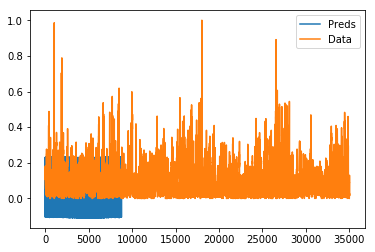

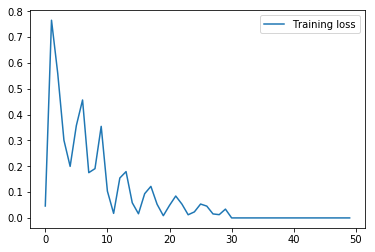

In [30]:
plt.plot(outputs.squeeze().detach().cpu().numpy(), label="Preds")
plt.plot(train_y_regr.detach().cpu().numpy(), label="Data")
plt.legend()
plt.show()

plt.plot(hist, label="Training loss")
plt.legend()
plt.show()

### Testing the model

In [24]:
test_hist = np.zeros(5)
hidden_test=None
test_X_regr=test_X_regr.to(device)
test_y_regr=test_y_regr.to(device)
for i in range(5):
  with torch.no_grad():
    outputs,hidden_test = rnnModel(test_X_regr,hidden_test)
    hidden_test=hidden_test.to(device)
    outputs=outputs.to(device)
    loss = loss_func(outputs.squeeze(), test_y_regr)
    print("Epoch ", i, "MSE: ", loss.item())
    test_hist[i] = loss.item()

Epoch  0 MSE:  0.03810420259833336
Epoch  1 MSE:  0.0380474254488945
Epoch  2 MSE:  0.03806329891085625
Epoch  3 MSE:  0.0380474254488945
Epoch  4 MSE:  0.03806329891085625


### Please answer the questions below to complete the experiment:




In [0]:
#@title RNN's cannot be used to classify images?{ run: "auto", form-width: "500px", display-mode: "form" }
Answer = "FALSE" #@param ["TRUE","FALSE"]


In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = " test" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [36]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 4779
Date of submission:  09 May 2019
Time of submission:  01:00:34
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
